<a href="https://colab.research.google.com/github/ussalbt/datascience/blob/main/DAwPy_S7_(Handling_Missing_Values)_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 7</p><h1>

# Handling with Missing Values

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
id_no = ["P001","P002","P003","P004","P005","P006","P007","P008","P009","P010","P011"]
gender=["M","F","M","F","M","F","M","F","M","F","M"]
status = ["FT","PT","-","FT","PT","PT","FT","-","PT","FT",np.nan]
dept = ["DS","FS","AWS","AWS","DS",np.nan,"FS","FS",np.nan,"DS","AWS"]
V1 = np.array([2,3,5,np.nan,7,1,np.nan,10,14,"-",6])
V2 = np.array([8,np.nan,5,8,11,np.nan,np.nan,2,3,7,9])
salary = np.array([np.nan,54,59,120,58,75,np.nan,136,60,125,np.nan])
df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


## Type of NaN Values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [36]:
type(np.nan)

float

In [37]:
type(np.NaN)

float

In [38]:
type(None)

NoneType

In [39]:
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [40]:
type(df.salary[0])

numpy.float64

In [41]:
type(df.salary[1])

numpy.float64

In [42]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [43]:
type(df.status[2])

str

In [44]:
type(df.status[10])

float

In [45]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [46]:
type(df.var1[3])

str

In [47]:
type(df.var1[9])

str

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object

**Difference between None and NaN in Pandas**

https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas

https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb

**Difference between np.nan and np.NaN**

https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan

**Difference between nan and 'nan' in Python**

https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python

https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b

## Detecting Missing Values

NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [48]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [49]:
#df.isnull()
df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [50]:
#df.notnull()
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [51]:
df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [52]:
df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [53]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [54]:
df.isnull().sum().sum()#tüm data frame


9

In [55]:
df.salary.isnull().any()

True

In [56]:
df.salary.isnull().sum()

3

In [57]:
df.isnull().sum()/len(df)*100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [58]:
df.loc[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [59]:
df.loc[~df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [60]:
df.loc[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [61]:
df.loc[df.salary.isnull()]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN
10,P011,M,NaN,AWS,6,9.0,NaN


## Converting inappropriate values to NaN values

- map()
- replace()

In [62]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [63]:
df["var1"].map({"-":np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When arg is a dictionary, values in Series that are not in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN.

https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.

In [64]:
df["var1"].replace(to_replace="-", value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [65]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [66]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [67]:
df["var1"].replace(to_replace=["-", "nan"], value=np.nan)

0       2
1       3
2       5
3     NaN
4       7
5       1
6     NaN
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [68]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")

In [69]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [70]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [71]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [72]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [73]:
df.isnull().sum(axis=1)

0     1
1     1
2     1
3     1
4     0
5     2
6     3
7     1
8     1
9     1
10    2
dtype: int64

## Missing value handling methods

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values. This percentage can change according to the data. So each situation should be evaluated case by case.
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ### Dropping
 
 - dropna()
 - drop()

In [74]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [75]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58.0


In [76]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [77]:
df.dropna(axis=1, how="all", thresh=None, inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


* 'any' : If any NA values are present, drop that row or column.
* 'all' : If all values are NA, drop that row or column.

https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

In [78]:
df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [79]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [80]:
df.dropna(axis=1, how="any", thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,NaN
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


thresh=N requires that a column has at least N **non-NaNs to survive.** 

https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935

In [81]:
df.drop([1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0
4,P005,M,PT,DS,7.0,11.0,58.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [82]:
df.drop(["var1","var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54.0
2,P003,M,NaN,AWS,59.0
3,P004,F,FT,AWS,120.0
4,P005,M,PT,DS,58.0
5,P006,F,PT,NaN,75.0
6,P007,M,FT,FS,NaN
7,P008,F,NaN,FS,136.0
8,P009,M,PT,NaN,60.0
9,P010,F,FT,DS,125.0


In [83]:
df.drop(index=[1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0
4,P005,M,PT,DS,7.0,11.0,58.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [84]:
df.drop(columns=["var1", "var2"])

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54.0
2,P003,M,NaN,AWS,59.0
3,P004,F,FT,AWS,120.0
4,P005,M,PT,DS,58.0
5,P006,F,PT,NaN,75.0
6,P007,M,FT,FS,NaN
7,P008,F,NaN,FS,136.0
8,P009,M,PT,NaN,60.0
9,P010,F,FT,DS,125.0


 ### Filling Missing Values (Imputation)
 - fillna()
 - where()
 - interpolate()

In [85]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


 #### a.Filling with a specific value

In [86]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0.0
1,P002,F,PT,FS,3.0,0.0,54.0
2,P003,M,0,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,0.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,0,1.0,0.0,75.0
6,P007,M,FT,FS,0.0,0.0,0.0
7,P008,F,0,FS,10.0,2.0,136.0
8,P009,M,PT,0,14.0,3.0,60.0
9,P010,F,FT,DS,0.0,7.0,125.0


In [87]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [88]:
df.var1.fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [89]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [90]:
df.var1.mean()

6.0

In [91]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [92]:
df.var1.median()

5.5

In [93]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [94]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [95]:
df.fillna(df.mean())

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,NaN,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [96]:
df.fillna({"dept":"other", "var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,other,1.0,7.5,75.0
6,P007,M,FT,FS,6.0,7.5,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,other,14.0,3.0,60.0
9,P010,F,FT,DS,6.0,7.0,125.0


**where() Replace values where the condition is False.**

In [97]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [98]:
df.where(cond=df.notna(), other=df.mean(), axis = 1)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,NaN,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [99]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [100]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

 #### c.Filling the Missing Values of Categorical Variables

In [101]:
df["dept"].mode()

0    AWS
1     DS
2     FS
dtype: object

In [102]:
df["dept"].mode()[0]

'AWS'

In [103]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [104]:
df.dept

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     NaN
6      FS
7      FS
8     NaN
9      DS
10    AWS
Name: dept, dtype: object

In [105]:
df["dept"].fillna(method="bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [106]:
df["dept"].fillna(method="ffill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

 #### d.Filling by condition & by Group of the Categorical Variables 

In [107]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [108]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [109]:
df.loc[df["salary"]>=100,"status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [110]:
df.loc[df["salary"]<100,"status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [111]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [112]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [113]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [114]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [115]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [116]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [117]:
df.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [118]:
df.groupby("dept")["salary"].transform("mean")

0     86.000000
1     83.333333
2     89.500000
3     89.500000
4     86.000000
5     86.000000
6     83.333333
7     83.333333
8     83.333333
9     86.000000
10    89.500000
Name: salary, dtype: float64

In [119]:
df.groupby(["status", "dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [120]:
df.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [121]:
df["trans_salary"] = df.groupby(["status","dept"])["salary"].transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


In [122]:
df["salary"].fillna(df.groupby(["status","dept"])["salary"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


In [123]:
df.groupby(["gender","status"])["var1"].mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [125]:
var1_trans = df.groupby(["gender","status"])["var1"].transform('mean')
var1_trans

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [127]:
df["var1"].fillna(var1_trans, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0


In [128]:
cond= (df["gender"]=="M") & (df["status"]=="FT")
cond

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [129]:
df.loc[cond,"var2"]

0    8.0
6    NaN
Name: var2, dtype: float64

In [130]:
df.loc[cond,"var2"].mode()[0]

8.0

In [131]:
df.loc[cond, "var2"].fillna(df.loc[cond, "var2"].mode()[0])

0    8.0
6    8.0
Name: var2, dtype: float64

In [132]:
df.var2

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [134]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace = True)
df.var2

0      8.00
1      7.00
2      5.00
3      8.00
4     11.00
5      7.00
6      6.25
7      2.00
8      3.00
9      7.00
10     9.00
Name: var2, dtype: float64

### filling with Interpolation

Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [135]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [136]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

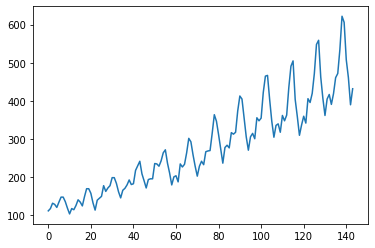

In [139]:
flights.passengers.plot()#;

In [140]:
flights_copy = flights.copy()

In [146]:
flights_copy.loc[np.random.randint(1,144,20),"passengers"] = None

In [147]:
flights_copy.isnull().sum()

year           0
month          0
passengers    49
dtype: int64

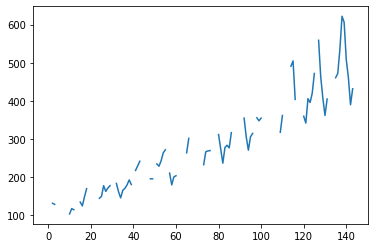

In [148]:
flights_copy.passengers.plot()

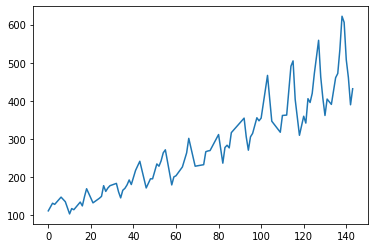

In [149]:
flights_copy["passengers"].interpolate().plot()

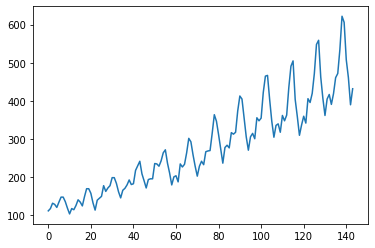

In [150]:
flights.passengers.plot()